In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp

sns.set_theme( style = "darkgrid" )

In [2]:
from Scripts import project_functions # This is called a relative import
df = project_functions.load_and_process("acs2017_county_data.csv")
df


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Production,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,6001,California,Alameda County,1629615,799649,829966,22.5,32.2,10.7,0.3,...,9.2,3.6,6.0,32.5,826310,79.3,13.2,7.3,0.1,6.0
1,6003,California,Alpine County,1203,664,539,9.7,64.6,1.5,20.6,...,8.3,1.6,14.0,21.9,374,58.6,30.2,11.2,0.0,14.6
2,6005,California,Amador County,37306,20005,17301,13.2,79.3,2.0,0.7,...,10.1,1.1,6.4,32.0,13444,63.9,21.0,14.7,0.4,9.3
3,6007,California,Butte County,225207,111587,113620,15.7,72.9,1.5,0.7,...,10.1,3.9,5.7,20.1,93439,72.8,17.2,9.7,0.4,9.1
4,6009,California,Calaveras County,45057,22292,22765,11.5,82.0,0.6,0.9,...,11.5,0.6,8.3,35.5,16721,67.6,18.2,13.7,0.4,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,48499,Texas,Wood County,43315,21523,21792,9.6,83.2,5.5,0.6,...,14.1,1.0,5.6,30.2,15960,78.4,14.1,7.1,0.4,7.8
437,48501,Texas,Yoakum County,8481,4286,4195,65.0,33.2,0.0,0.2,...,14.4,0.2,1.3,16.2,3755,71.7,17.5,10.7,0.1,7.5
438,48503,Texas,Young County,18166,8922,9244,18.1,78.8,1.5,0.5,...,13.7,1.4,6.1,15.3,8248,69.8,17.1,11.9,1.2,4.5
439,48505,Texas,Zapata County,14415,7190,7225,94.1,5.2,0.0,0.0,...,20.2,0.6,2.0,18.2,5146,66.0,21.0,12.6,0.4,12.4


In [3]:
percent_form =['Men','Women']
df[percent_form]=df[percent_form].div(df["TotalPop"], axis="index")*100
df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Production,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,6001,California,Alameda County,1629615,49.069811,50.930189,22.5,32.2,10.7,0.3,...,9.2,3.6,6.0,32.5,826310,79.3,13.2,7.3,0.1,6.0
1,6003,California,Alpine County,1203,55.195345,44.804655,9.7,64.6,1.5,20.6,...,8.3,1.6,14.0,21.9,374,58.6,30.2,11.2,0.0,14.6
2,6005,California,Amador County,37306,53.624082,46.375918,13.2,79.3,2.0,0.7,...,10.1,1.1,6.4,32.0,13444,63.9,21.0,14.7,0.4,9.3
3,6007,California,Butte County,225207,49.548637,50.451363,15.7,72.9,1.5,0.7,...,10.1,3.9,5.7,20.1,93439,72.8,17.2,9.7,0.4,9.1
4,6009,California,Calaveras County,45057,49.475109,50.524891,11.5,82.0,0.6,0.9,...,11.5,0.6,8.3,35.5,16721,67.6,18.2,13.7,0.4,7.1


In [4]:
df.shape

(441, 29)

In [5]:
df.loc[0:, "Men":"Women"]

,Men,Women
0,49.069811,50.930189
1,55.195345,44.804655
2,53.624082,46.375918
3,49.548637,50.451363
4,49.475109,50.524891
...,...,...
436,49.689484,50.310516
437,50.536493,49.463507
438,49.113729,50.886271
439,49.878599,50.121401


In [6]:
df.replace({'California': 'CA', 'Texas': 'TX', 'Florida': 'FL', 'New York': 'NY'})

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Production,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,6001,CA,Alameda County,1629615,49.069811,50.930189,22.5,32.2,10.7,0.3,...,9.2,3.6,6.0,32.5,826310,79.3,13.2,7.3,0.1,6.0
1,6003,CA,Alpine County,1203,55.195345,44.804655,9.7,64.6,1.5,20.6,...,8.3,1.6,14.0,21.9,374,58.6,30.2,11.2,0.0,14.6
2,6005,CA,Amador County,37306,53.624082,46.375918,13.2,79.3,2.0,0.7,...,10.1,1.1,6.4,32.0,13444,63.9,21.0,14.7,0.4,9.3
3,6007,CA,Butte County,225207,49.548637,50.451363,15.7,72.9,1.5,0.7,...,10.1,3.9,5.7,20.1,93439,72.8,17.2,9.7,0.4,9.1
4,6009,CA,Calaveras County,45057,49.475109,50.524891,11.5,82.0,0.6,0.9,...,11.5,0.6,8.3,35.5,16721,67.6,18.2,13.7,0.4,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,48499,TX,Wood County,43315,49.689484,50.310516,9.6,83.2,5.5,0.6,...,14.1,1.0,5.6,30.2,15960,78.4,14.1,7.1,0.4,7.8
437,48501,TX,Yoakum County,8481,50.536493,49.463507,65.0,33.2,0.0,0.2,...,14.4,0.2,1.3,16.2,3755,71.7,17.5,10.7,0.1,7.5
438,48503,TX,Young County,18166,49.113729,50.886271,18.1,78.8,1.5,0.5,...,13.7,1.4,6.1,15.3,8248,69.8,17.1,11.9,1.2,4.5
439,48505,TX,Zapata County,14415,49.878599,50.121401,94.1,5.2,0.0,0.0,...,20.2,0.6,2.0,18.2,5146,66.0,21.0,12.6,0.4,12.4


In [7]:
df.nunique()

CountyId           441
State                4
County             409
TotalPop           439
Men                440
Women              440
Hispanic           311
White              334
Black              166
Native              31
Asian               84
Pacific             14
Income             437
IncomeErr          426
IncomePerCap       438
IncomePerCapErr    414
Poverty            183
ChildPoverty       247
Professional       210
Production         162
OtherTransp         60
WorkAtHome         100
MeanCommute        197
Employed           440
PrivateWork        211
PublicWork         181
SelfEmployed       121
FamilyWork          19
Unemployment       108
dtype: int64

In [9]:
my_eda = df[['State','County','TotalPop','Unemployment', 'Employed', 'Poverty', 'ChildPoverty','IncomePerCap','Income','TotalPop']]
my_eda

,State,County,TotalPop,Unemployment,Employed,Poverty,ChildPoverty,IncomePerCap,Income,TotalPop
0,California,Alameda County,1629615,6.0,826310,11.3,13.0,41363,85743,1629615
1,California,Alpine County,1203,14.6,374,19.8,17.3,27448,63438,1203
2,California,Amador County,37306,9.3,13444,10.6,20.3,29628,60636,37306
3,California,Butte County,225207,9.1,93439,20.5,21.5,26304,46516,225207
4,California,Calaveras County,45057,7.1,16721,12.8,18.9,31652,54800,45057
...,...,...,...,...,...,...,...,...,...,...
436,Texas,Wood County,43315,7.8,15960,13.3,22.0,25955,48038,43315
437,Texas,Yoakum County,8481,7.5,3755,12.3,14.6,23681,62500,8481
438,Texas,Young County,18166,4.5,8248,16.5,25.9,25661,46351,18166
439,Texas,Zapata County,14415,12.4,5146,34.1,48.0,17817,34550,14415


In [9]:
my_eda.describe(exclude=np.object).T

,count,mean,std,min,25%,50%,75%,max
TotalPop,441.0,241449.283447,693148.227348,74.0,12972.0,40544.0,155719.0,10105722.0
Unemployment,441.0,6.663719,2.768327,0.0,5.1,6.4,7.9,26.3
Employed,441.0,111494.750567,330262.742344,39.0,4770.0,16629.0,68640.0,4805817.0
Poverty,441.0,16.054422,5.534720,2.8,12.6,15.7,18.7,41.5
ChildPoverty,441.0,22.462132,9.106596,0.0,16.6,22.0,27.2,62.3
IncomePerCap,441.0,26380.904762,6959.601627,12543.0,22152.0,25461.0,29693.0,69529.0
Income,441.0,52126.344671,13627.602260,24794.0,43529.0,50000.0,57813.0,106761.0
TotalPop,441.0,241449.283447,693148.227348,74.0,12972.0,40544.0,155719.0,10105722.0


In [10]:
my_eda.describe(exclude=np.number).T

,count,unique,top,freq
State,441,4,Texas,254
County,441,409,Orange County,4


### Boxplot of Income V/S State

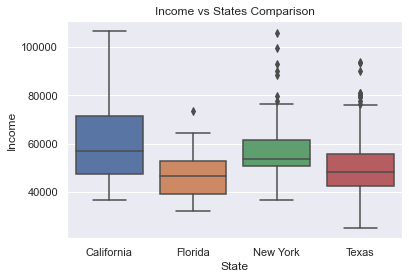

In [11]:
ax = sns.boxplot(y="Income", x ="State", data = my_eda).set_title("Income vs States Comparison")
fig = ax.get_figure()
fig.savefig("images/fig1.png")

### Barplot of total population per State 

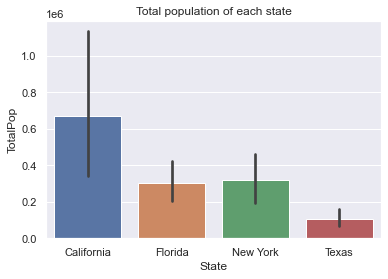

In [12]:
ax = sns.barplot(x = "State", y = "TotalPop",data = df).set_title("Total population of each state")
fix = ax.get_figure()
fig.savefig("images/fig2.png")

In [13]:
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Income Per Capita VS State Comparison 

This seems more valid as income per capita is the measure of amount of money earned per person rather than of the state as a whole
As seen the population of all of these 4 states are quite different in size checking the income of a state as whole doesn't make sense
ineteresting how the income per cap for California and New York are similar
Similarly, income per capita for Texas and Florida are similar


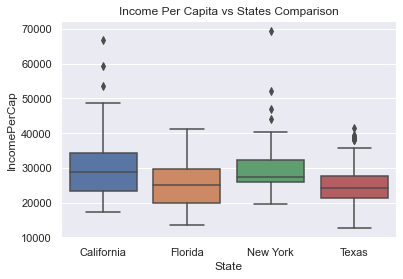

In [14]:
ax = sns.boxplot(y="IncomePerCap", x ="State", data = my_eda).set_title("Income Per Capita vs States Comparison")
fig = ax.get_figure()
fig.savefig("images/fig3.png")

print(color.BOLD + "This seems more valid as income per capita is the measure of amount of money earned per person rather than of the state as a whole" + color.END)
print(color.BOLD +"As seen the population of all of these 4 states are quite different in size checking the income of a state as whole doesn't make sense"+ color.END)
print(color.BOLD + color.UNDERLINE + "ineteresting how the income per cap for California and New York are similar" + color.END)
print(color.BOLD + color.UNDERLINE +"Similarly, income per capita for Texas and Florida are similar" + color.END)

### Correlation between Poverty and Child Poverty

In [15]:
print(my_eda[['Poverty','ChildPoverty']].corr())

print(color.BOLD + "Not Suprisingly Child Poverty Rate and Poverty Rates are correlated" + color.END)

               Poverty  ChildPoverty
Poverty       1.000000      0.904335
ChildPoverty  0.904335      1.000000
Not Suprisingly Child Poverty Rate and Poverty Rates are correlated


### Poverty Rates Per State

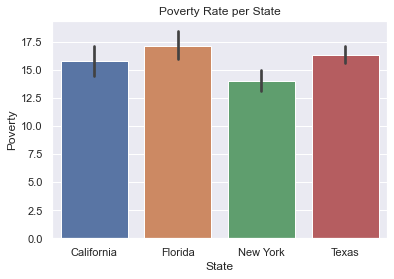

In [16]:

ax = sns.barplot(x=my_eda['State'],y=my_eda['Poverty']).set_title("Poverty Rate per State")
fig = ax.get_figure()
fig.savefig("images/fig4.png")


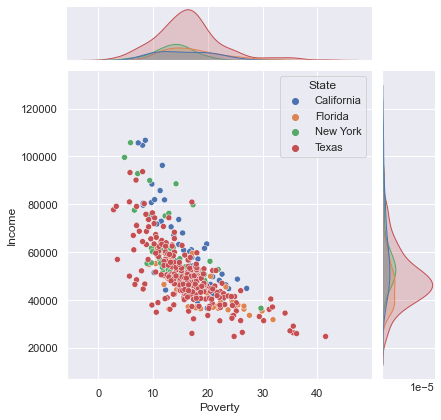

In [17]:

sns.jointplot(data=my_eda, x="Poverty", y="Income", hue="State")
fig = ax.get_figure()
fig.savefig("images/fig5.png")

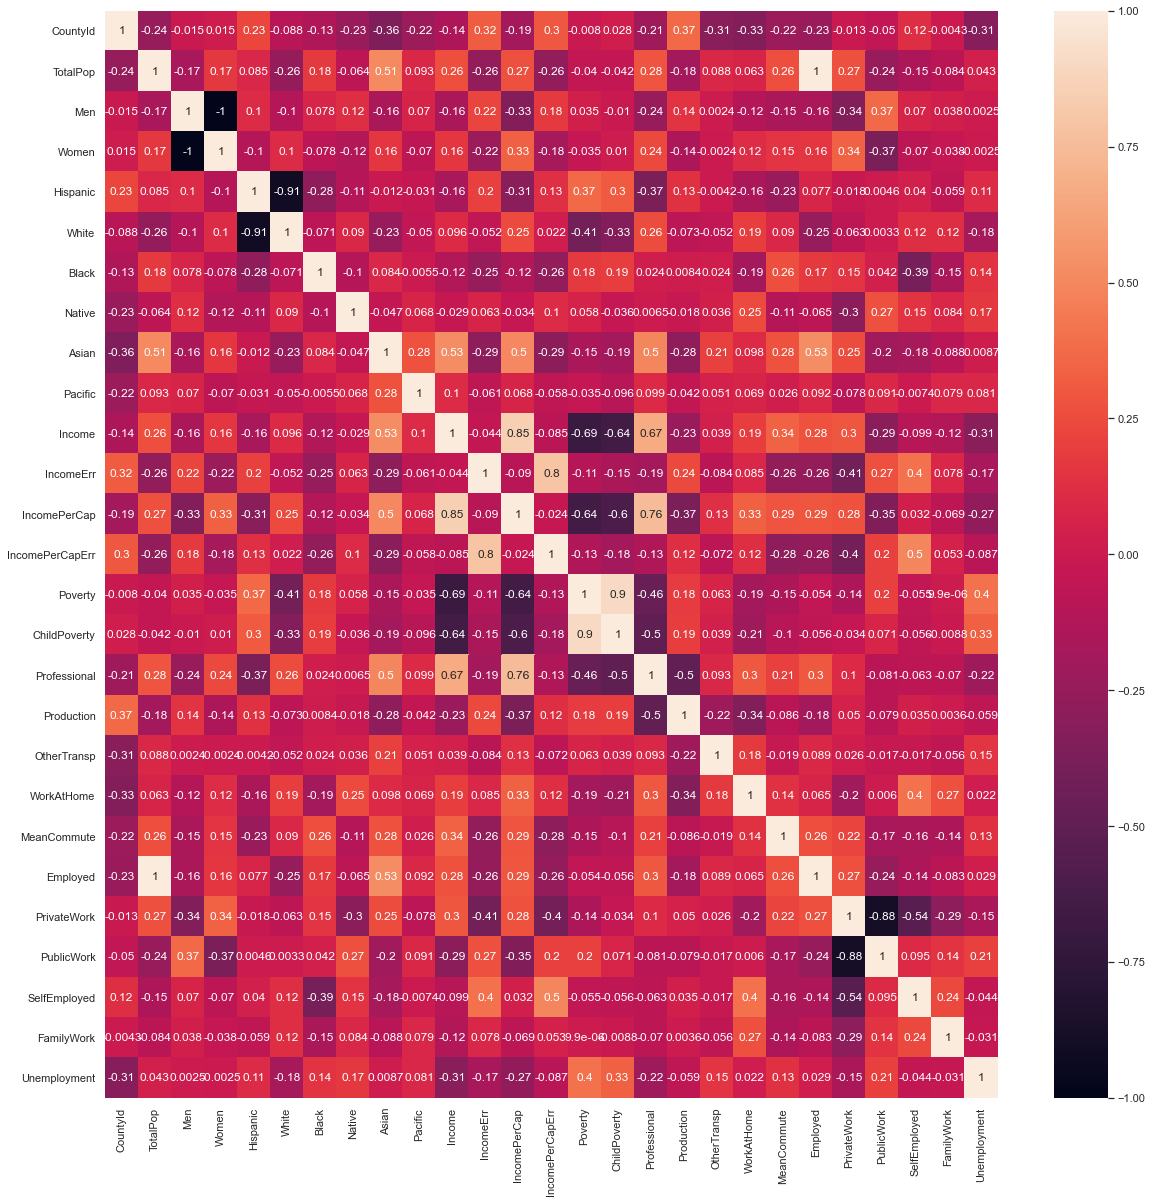

In [19]:
ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

**We can see that there is a high correlation between columns like:**
   
    1) Income and IncomePerCap
    2) Poverty and ChildPoverty
    3) TotalPop and Employed
    4) Private Work and Public Work
    5) White and Hispanic 

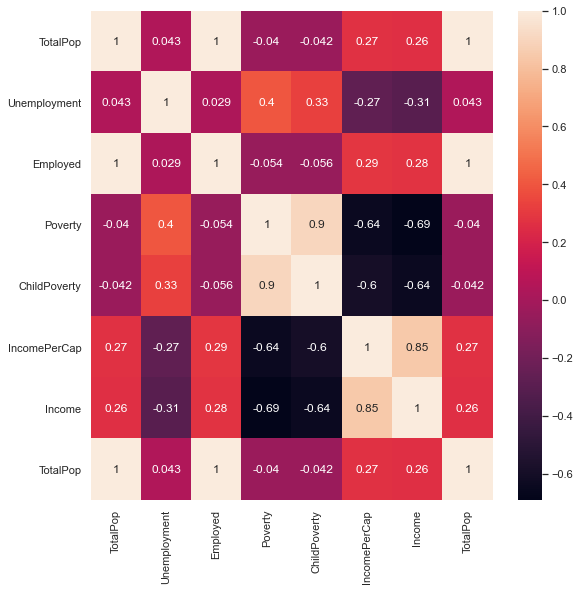

In [12]:
ax = plt.subplots(figsize=(9,9))
sns.heatmap(my_eda.corr(), annot=True)
plt.show()